In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.animation import FuncAnimation
import networkx as nx
import random as rd
import os
import glob
import imageio

In [2]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 6)
style.use('seaborn')

# Task 1

In [17]:
def sir(x, beta, gamma):
    """
    Single run of SIR model.
    Args:
        x - s, i, r values vector,
        beta - infection rate,
        gamma - recovery rate,
        n - population size.
    """
    s, i , r = x
    ds = -beta*s*i 
    di = beta*s*i - gamma*i
    dr = gamma*i
    return np.array([ds, di, dr])

In [18]:
def euler(x0, beta, gamma, steps):
    """
    Euler method for SIR model.
    Args:
        x0 - initial conditions vector,
        beta - infection rate,
        gamma - recovery rate,
        n - population size,
        steps - number of values to compute.
    """
    assert len(x0) == 3
    
    x = np.zeros([steps, 3])
    x[0] = x0

    for i in range(1, steps):
        x[i] = x[i-1] + sir(x[i-1], beta, gamma)

    x_df = pd.DataFrame(x)
    x_df.columns = ['S', 'I', 'R']
    
    return x_df

In [19]:
def plot_sir(data, beta, gamma, n):
    data.plot(title=fr'SIR for $\beta={beta}$, $\gamma={gamma}$, $n={n}$, $R_0={beta/gamma}$')

In [22]:
N = 10000
X0 = [N-1, 1, 0]

### $R_0 = \frac{\beta N}{\gamma} > 1$

In [8]:
beta1 = 0.4 / N
gamma1 = 0.1

In [9]:
e1 = euler(X0, beta1, gamma1, 1000)

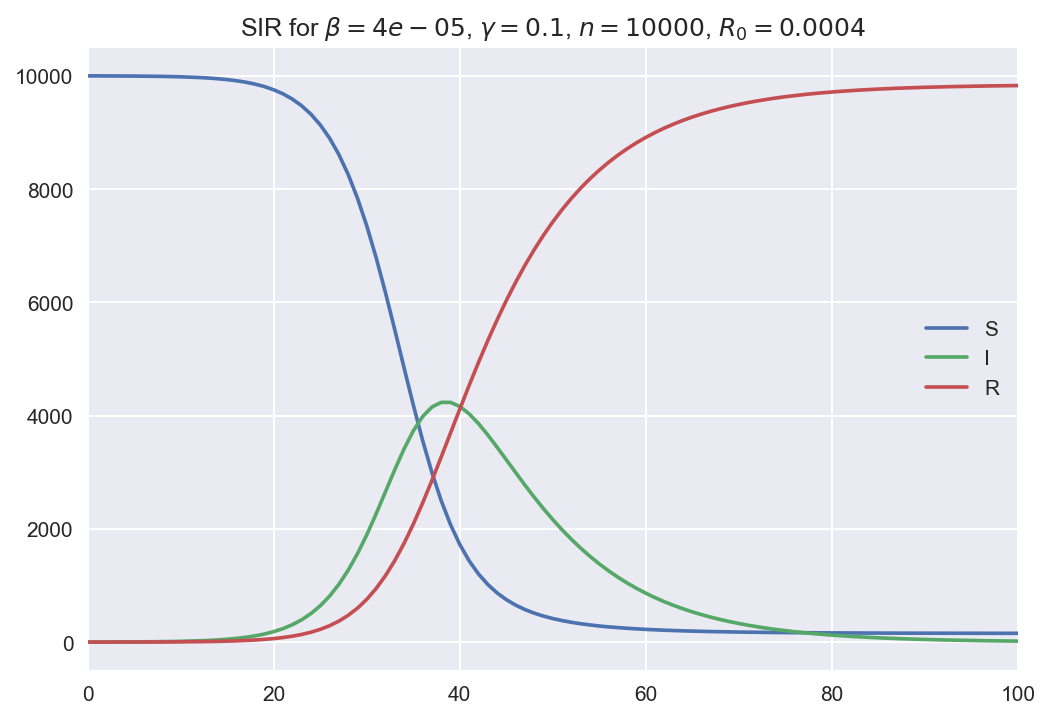

In [10]:
plot_sir(e1, beta1, gamma1, N)
plt.xlim([0, 100])
plt.show()

On the above plot we can see that there was an epidemic outburst.

In [11]:
beta2 = 0.8 / N
gamma2 = 0.5

In [12]:
e2 = euler(X0, beta2, gamma2, 1000)

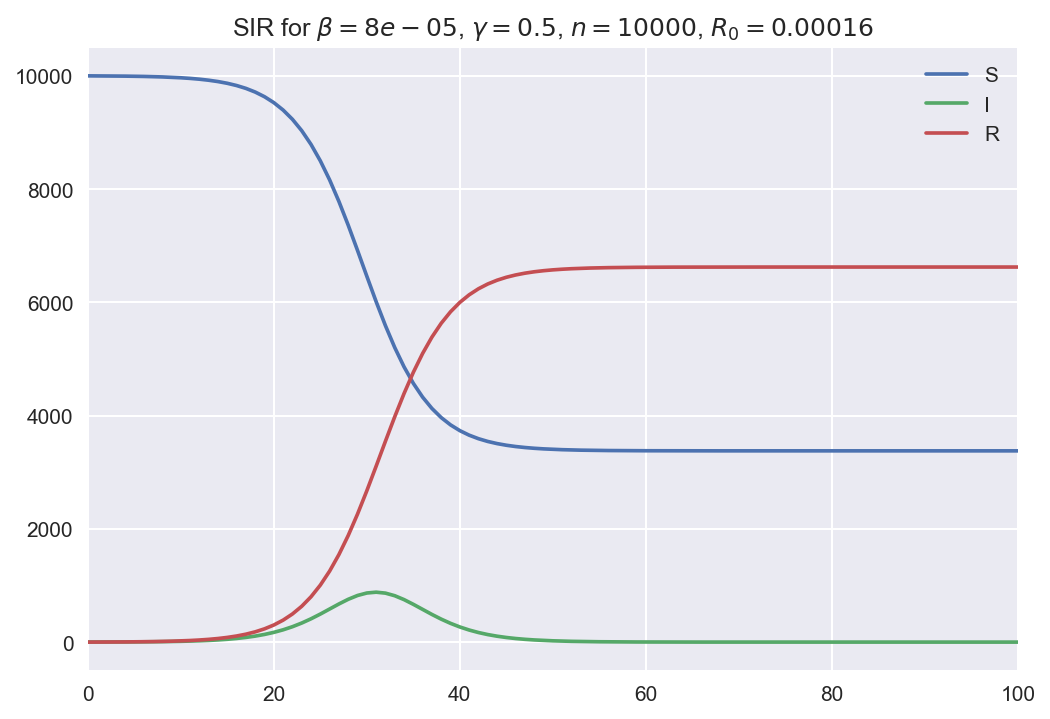

In [13]:
plot_sir(e2, beta2, gamma2, N)
plt.xlim([0, 100])
plt.show()

For this set of parameters, we also observe an epidemic outburs, but this time much smaller.

### $R_0 = \frac{\beta N}{\gamma} < 1$

In [14]:
beta3 = 0.2 / N
gamma3 = 0.4

In [15]:
e3 = euler(X0, beta3, gamma3, 1000)

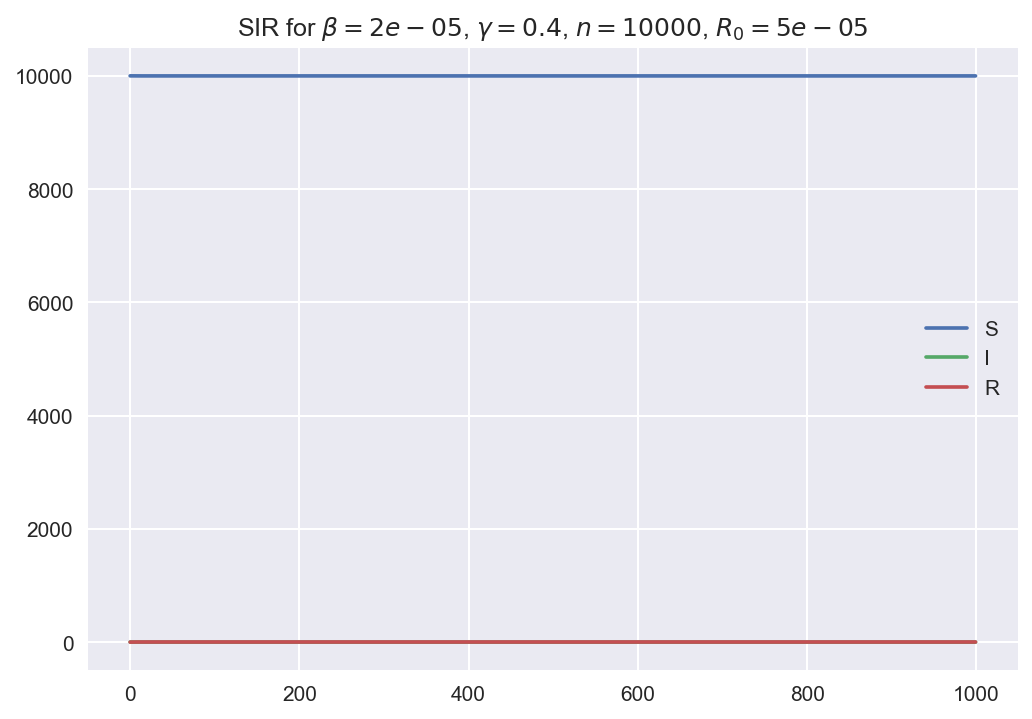

In [16]:
plot_sir(e3, beta3, gamma3, N)
plt.show()

We see now that as we put $\beta < \gamma$, we observe no epidemic outburst, even though we have $R_0 > 1$. To make sure that's the case, we plot the $I$ component separately.

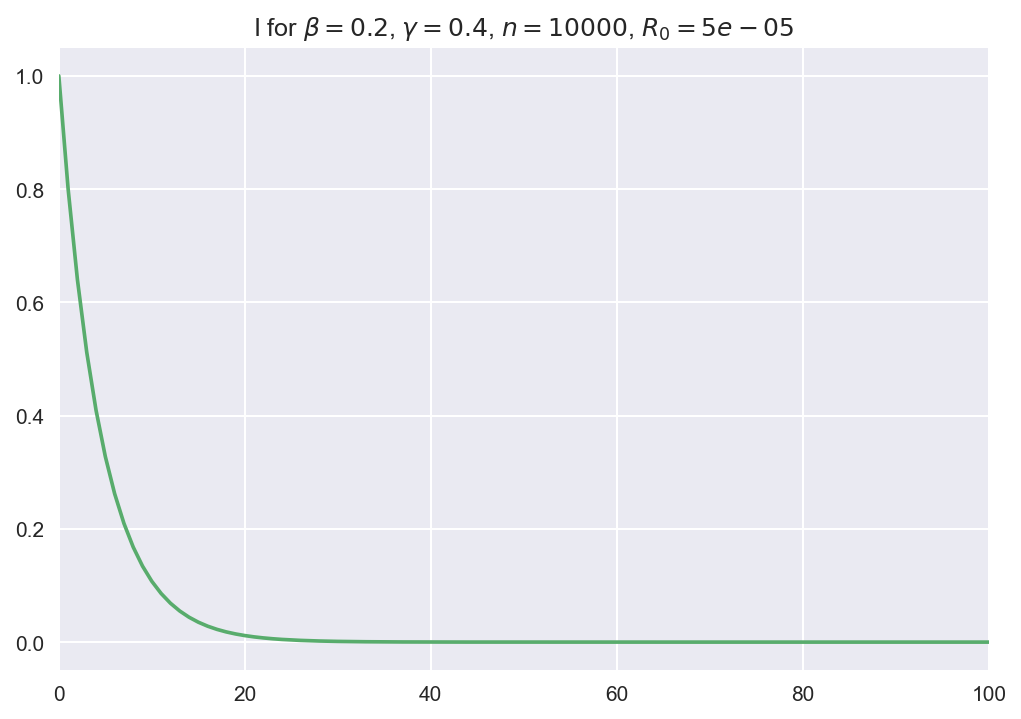

In [23]:
e3['I'].plot(title=fr'I for $\beta=0.2$, $\gamma=0.4$, $n=10000$, $R_0 = {beta3/gamma3}$', color='#58ac6c')
plt.xlim([0, 100])
plt.show()

We see that, in fact, an infected individual recovered, causing no further infections.

In [24]:
beta4 = 0.5 / N
gamma4 = 0.8

In [25]:
e4 = euler(X0, beta4, gamma4, 1000)

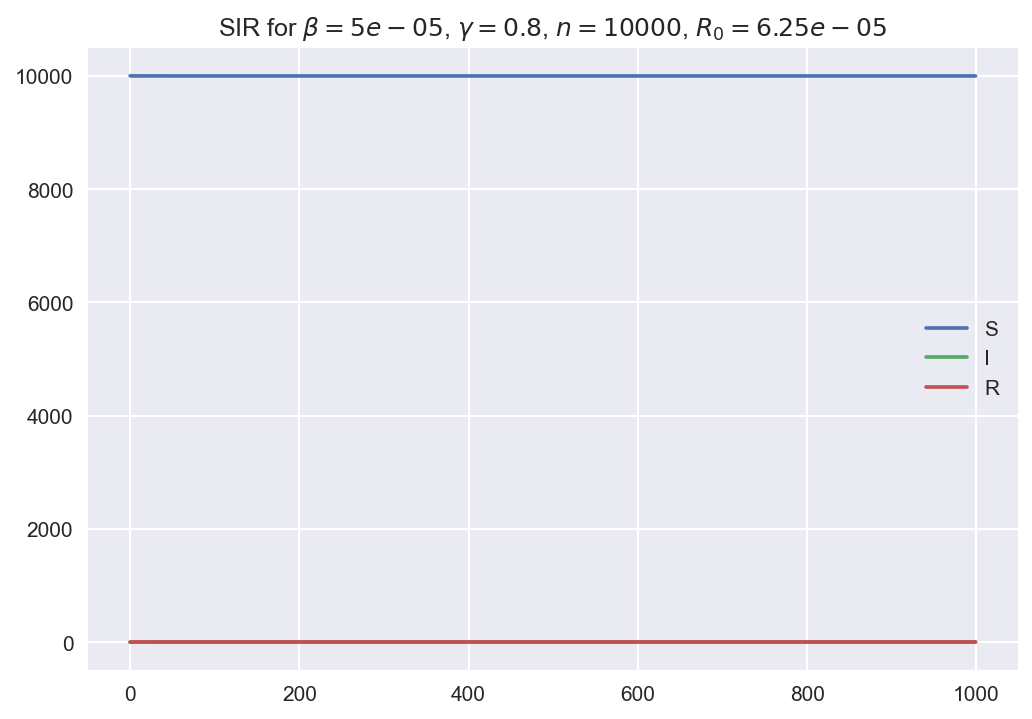

In [26]:
plot_sir(e4, beta4, gamma4, N)

Again, we don't observe an epidemic outbreak. We can look at I separately.

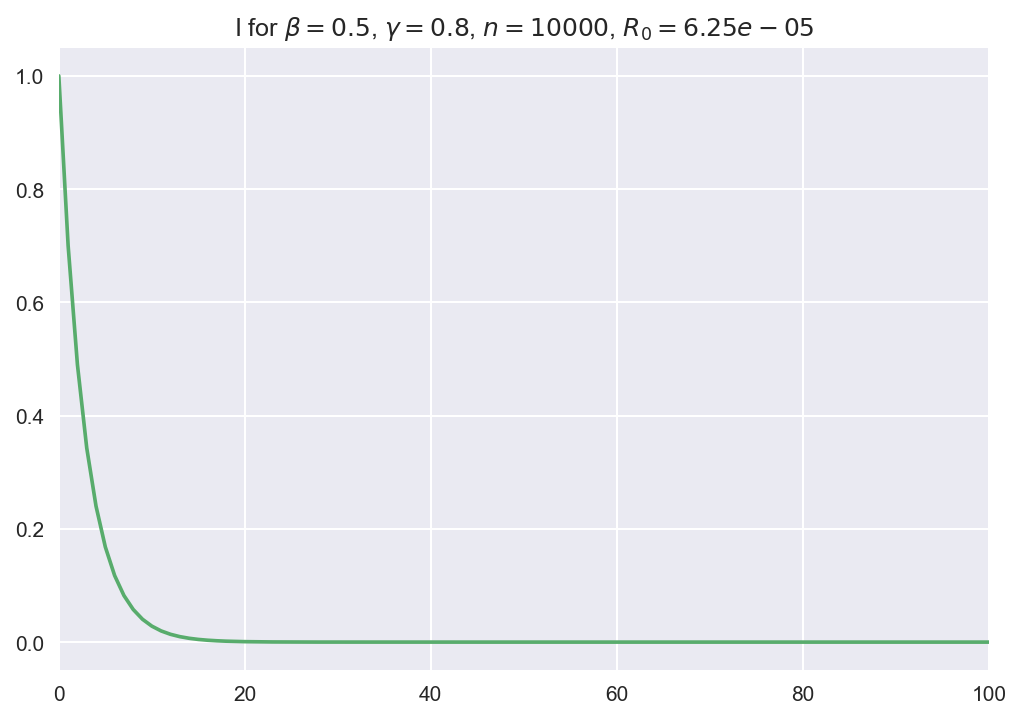

In [27]:
e4['I'].plot(title=fr'I for $\beta=0.5$, $\gamma=0.8$, $n=10000$, $R_0 = {beta4/gamma4}$', color='#58ac6c')
plt.xlim([0, 100])
plt.show()

Analogous situation to previous example.

In [32]:
def si(x, beta, gamma):
    """
    Single run of SI model.
    Args:
        x - s, i values vector,
        beta - infection rate,
        gamma - recovery rate,
        n - population size.
    """
    s, i = x
    ds = -beta*s*i
    di = beta*s*i - gamma*i
    
    return np.array([ds, di])

In [33]:
s0 = np.linspace(1, 100, 20)
i0 = np.linspace(1, 100, 20)
S, I = np.meshgrid(s0, i0)
u, v = np.zeros(S.shape), np.zeros(I.shape)
n1, n2 = S.shape

In [34]:
beta5 = 0.4 / 101
gamma5 = 0.2

In [35]:
for j in range(n1):
    for k in range(n2):
        s = S[j, k]
        i = I[j, k]
        SI = si([s, i], beta5, gamma5)
        u[j, k] = SI[0]
        v[j, k] = SI[1]

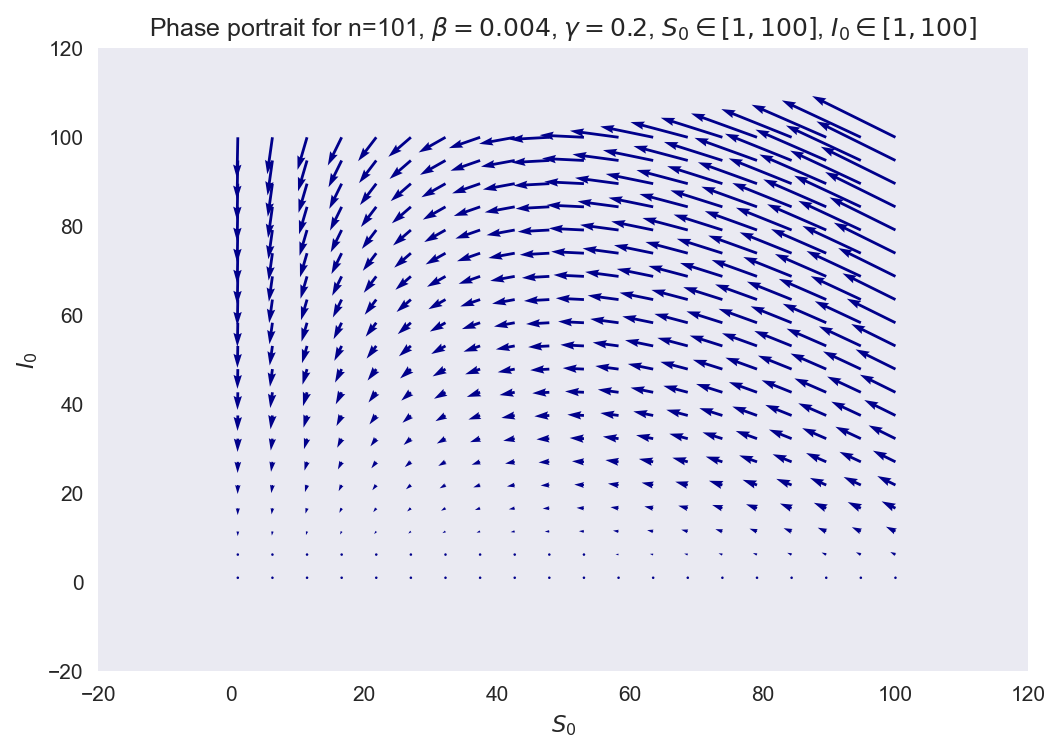

In [38]:
plt.quiver(S, I, u, v, color='darkblue')
plt.title(fr'Phase portrait for n=101, $\beta={round(beta5, 3)}$, $\gamma={gamma5}$, $S_0 \in [1, 100]$, $I_0 \in [1, 100]$')
plt.xlim([-20, 120])
plt.ylim([-20, 120])
plt.xlabel(r'$S_0$')
plt.ylabel(r'$I_0$')
plt.grid(False)
plt.show()

<ul>
    <li> Stable points for $I_0 = 0$, also when both $S_0$ and $I_0$ are small (0,20). 
    <li> As we reach big values for both $S_0$ (30,100) and $I_0$ (20,100), $S$ decreases and $I$ increases 
    <li> For $S_0$ around (10,30), same $I_0$, S continues to decrease and $I$ starts to decrease. 
    <li> For $S_0$ = 0, S remains stable and $I$ decreases.

In [27]:
def total_infections(x0, betas, gammas, N):
    
    assert len(betas) == len(gammas)
    
    M = len(betas)
    infections = np.zeros([M, 2])
    for i in range(M):
        R0 = betas[i]*N / gammas[i]
        sir_run = euler(x0, betas[i], gammas[i], 1000)
        infected = sir_run['R'][999]
        infections[i] = [R0, infected]
        
    infections = pd.DataFrame(infections)
    infections.columns = ['R0', 'Infected_total']
    
    return infections

In [67]:
N = 100
X0 = [N-1, 1, 0]

In [68]:
Betas = np.arange(0.01, 1, 0.01) / N
Gammas = np.arange(0.99, 0.00, -0.01)

In [69]:
TI = total_infections(X0, Betas, Gammas, N)

In [70]:
TI = TI.sort_values('R0')

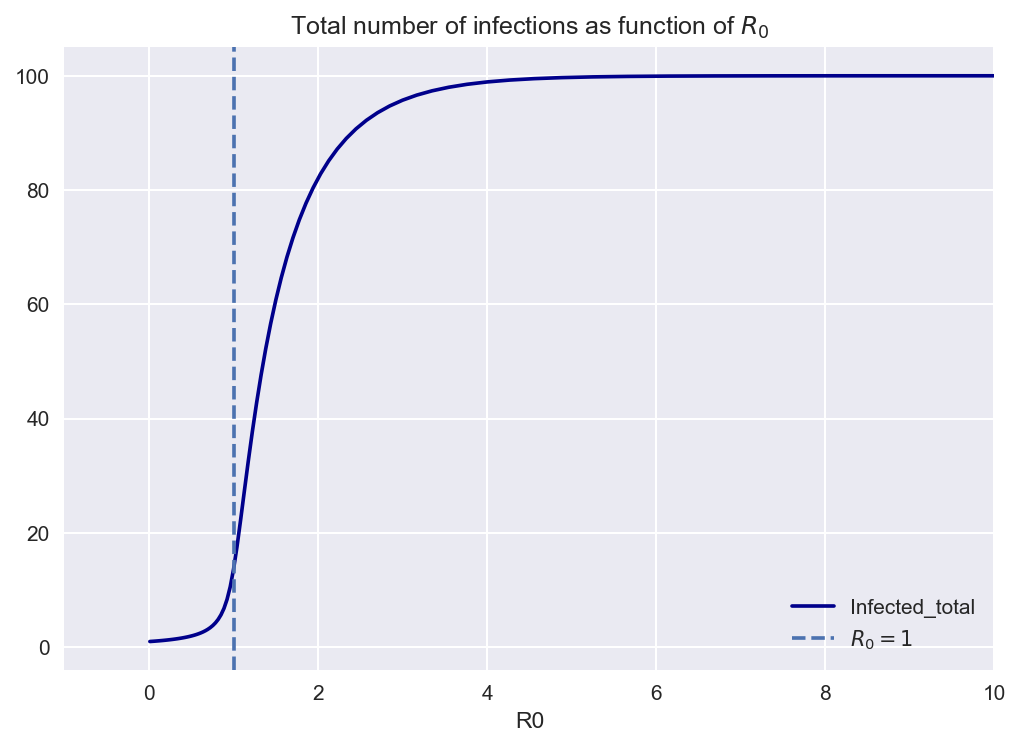

In [74]:
TI.plot(x='R0', y='Infected_total', color='darkblue')
plt.title('Total number of infections as function of $R_0$')
plt.plot(np.ones(len(Betas)), np.linspace(TI['Infected_total'].min()-5, TI['Infected_total'].max()+5, len(Betas)), 
         linestyle='dashed', label='$R_0 = 1$')
plt.xlim([-1,10])
plt.ylim([TI['Infected_total'].min()-5, TI['Infected_total'].max()+5])
plt.legend()
plt.show()

# Task 2

In [20]:
def sir_graph(graph, p, init_node = 'rand', animate=False, measure=False):
    
    for node in graph.nodes():
        graph.nodes[node]['state'] = 'S'
        
    N = len(graph.nodes)
    
    if init_node == 'rand':
        initial = rd.choice(list(graph.nodes))
    else:
        initial = init_node
        
    graph.nodes[initial]['state'] = 'I'     
    
    nodes_data = graph.nodes(data=True)
    infected = [node for node, data in nodes_data if data['state'] == 'I']
    
    I = [1]
    
    if animate == True:
        frames = []
        color_map = ['blue']*N
        node_list = list(graph.nodes)
        init_ind = node_list.index(initial)
        color_map[init_ind] = 'red'
        frames = np.array([color_map])
        
    while len(infected) > 0:
        
        for node in graph.nodes:
            
            if graph.nodes[node]['state'] == 'I':
                neighs = graph.neighbors(node)
                sus = [n for n in neighs if graph.nodes[n]['state'] == 'S']
                for s in sus:
                    if rd.random() < p:
                        graph.nodes[s]['state'] = 'I'
                        if animate == True:
                            iind = node_list.index(s)
                            color_map[iind] = 'red'       
                        
                graph.nodes[node]['state'] = 'R'
                
            if animate == True:
                frames = np.vstack((frames, color_map))
                if graph.nodes[node]['state'] == 'R':
                    rind = node_list.index(node)
                    color_map[rind] = 'green'
                    
            
        nodes_data = graph.nodes(data=True)
        infected = [node for node, data in nodes_data if data['state'] == 'I']
        I.append(len(infected))
    
    if measure == True:
        nodes_data = graph.nodes(data=True)
        infected_fraction = len([node for node, data in nodes_data if data['state'] == 'R']) / N
        max_infected = I.index(max(I))
        measures = [infected_fraction, len(I), max_infected]
    
    if animate == True and measure == False:
        return frames
    elif animate == False and measure == True:
        return measures
    elif animate == True and measure == True:
        return frames, measures
    else:
        return np.array(I)

In [21]:
def plot_sir_graph(n, graph, p, init_node, graph_type):
    
    res = sir_graph(graph, p, init_node)
    N = len(graph.nodes)
    d = {'0': res / N}
    
    for i in range(1, n):
        res_new = sir_graph(graph, p, init_node)
        d[f'{i}'] = res_new / N
    
    df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in d.items()]))
    df.fillna(0, inplace=True)
    df['avg fraction of infected'] = df.mean(axis='columns')
    df['time step'] = df.index

    df.plot(kind='scatter', x='time step', y='avg fraction of infected', label='infected',
            title=f'SIR on {graph_type} for p = {p}, initial node = {init_node}')

In [22]:
def save_anim(graph, pos, filename):
    
    try:
        os.makedirs('animation')
    except FileExistsError:
        pass
    
    graph_frames = sir_graph(graph, 0.5, animate=True)
    
    for i in range(len(graph_frames)):
        nx.draw(graph, node_color=graph_frames[i], with_labels=True, pos=pos)            
        plt.savefig(f'animation/{i}.png')
        plt.clf()
        plt.close()
    
    g = glob.glob('animation/*.png')
    g_sorted = [f'animation\\{j}.png' for j in range(len(g))]
    frames = [imageio.imread(frame) for frame in g_sorted]
    imageio.mimsave(f'animation/{filename}.gif', frames, loop=1)

    for file in g:
        os.remove(file)

In [23]:
net = nx.grid_2d_graph(10, 10)

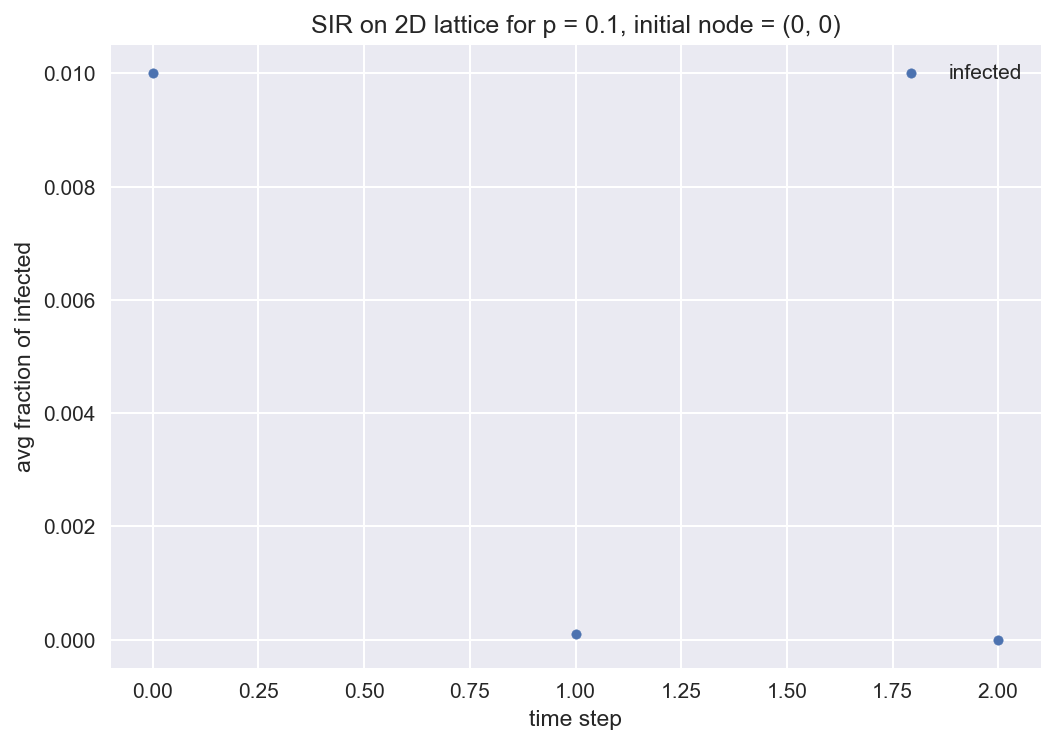

In [24]:
plot_sir_graph(100, net, 0.1, (0,0), '2D lattice')

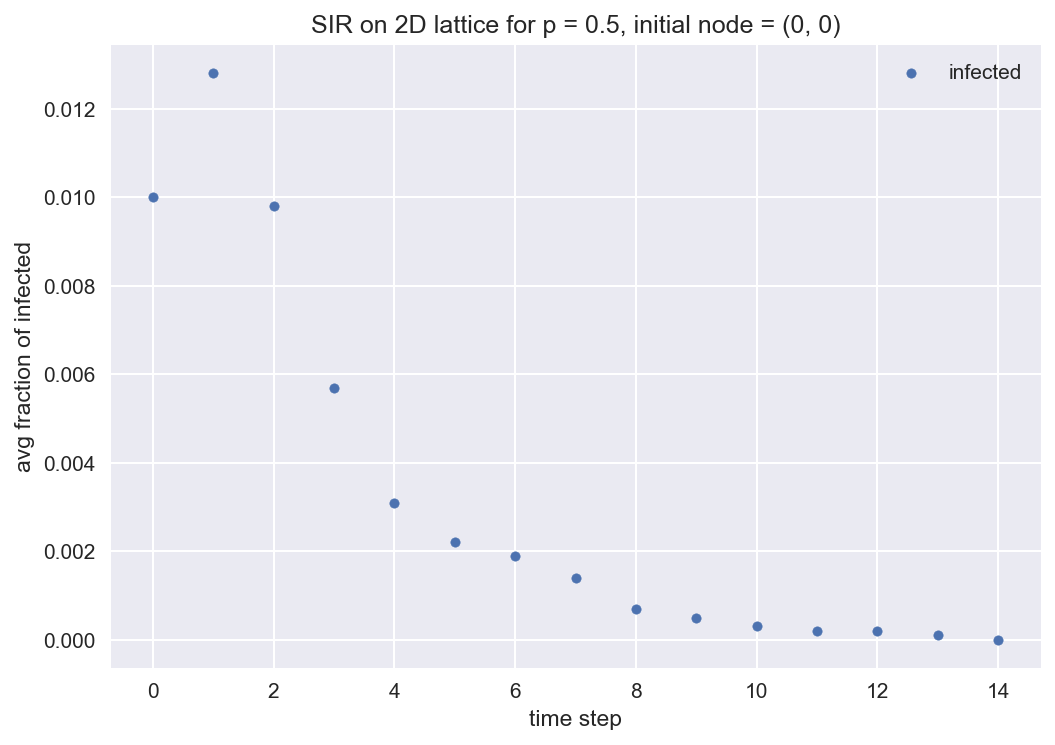

In [25]:
plot_sir_graph(100, net, 0.5, (0,0), '2D lattice')

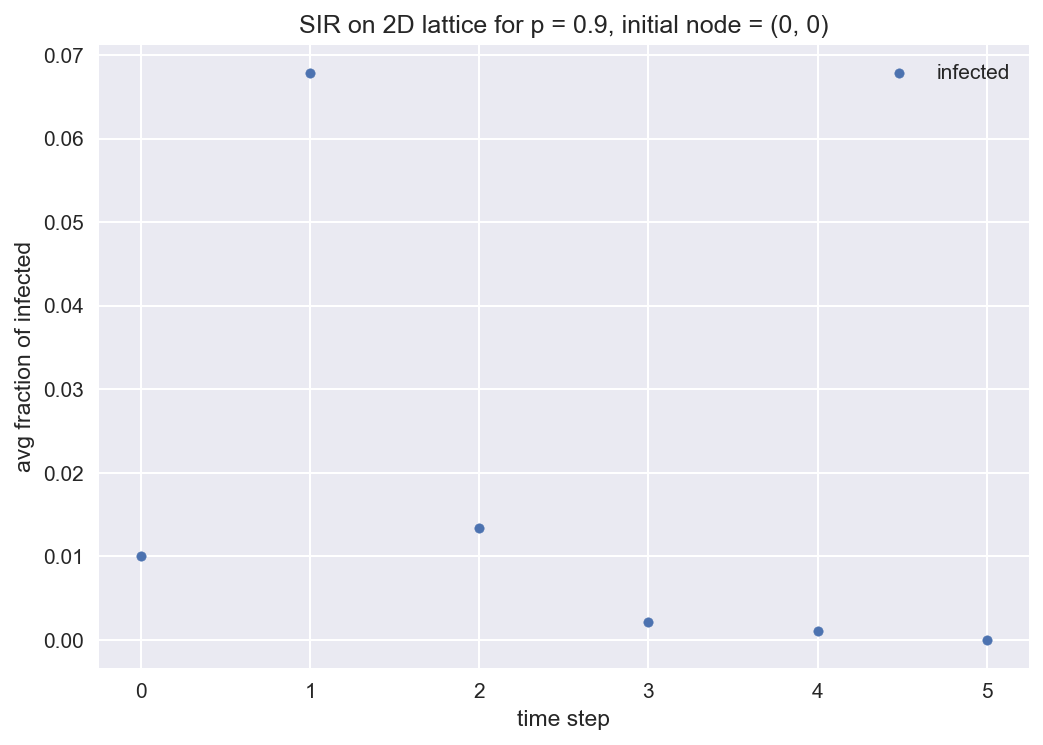

In [26]:
plot_sir_graph(100, net, 0.9, (0,0), '2D lattice')

In [23]:
rg = nx.erdos_renyi_graph(100, 0.04)

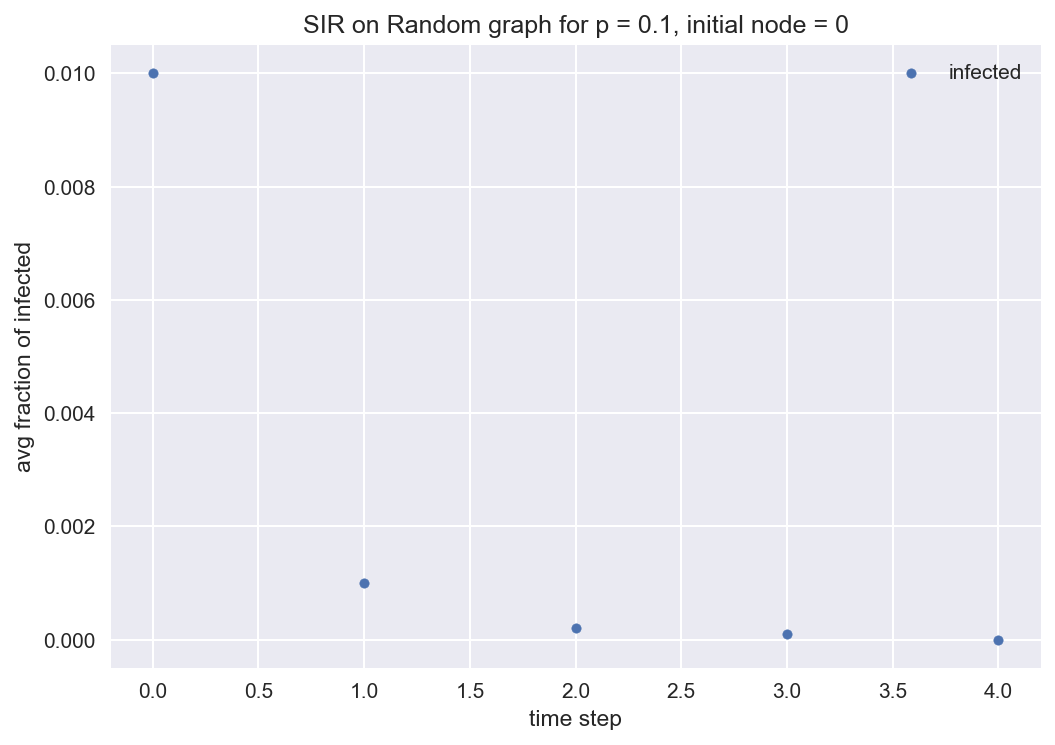

In [24]:
plot_sir_graph(100, rg, 0.1, 0, 'Random graph')

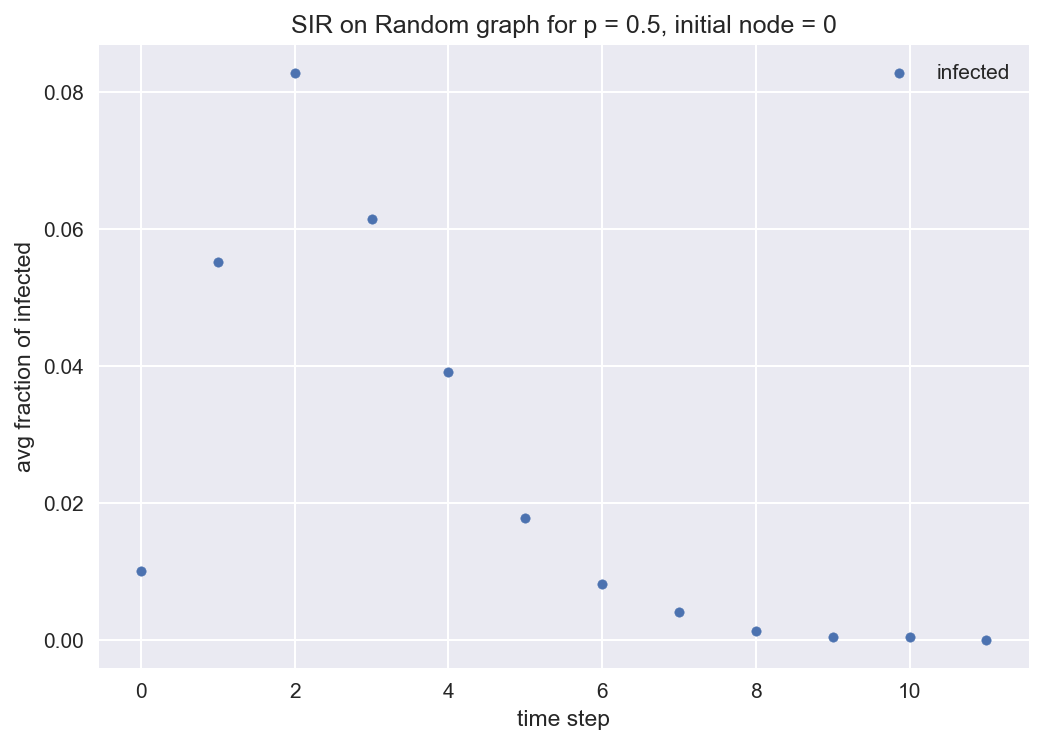

In [25]:
plot_sir_graph(100, rg, 0.5, 0, 'Random graph')

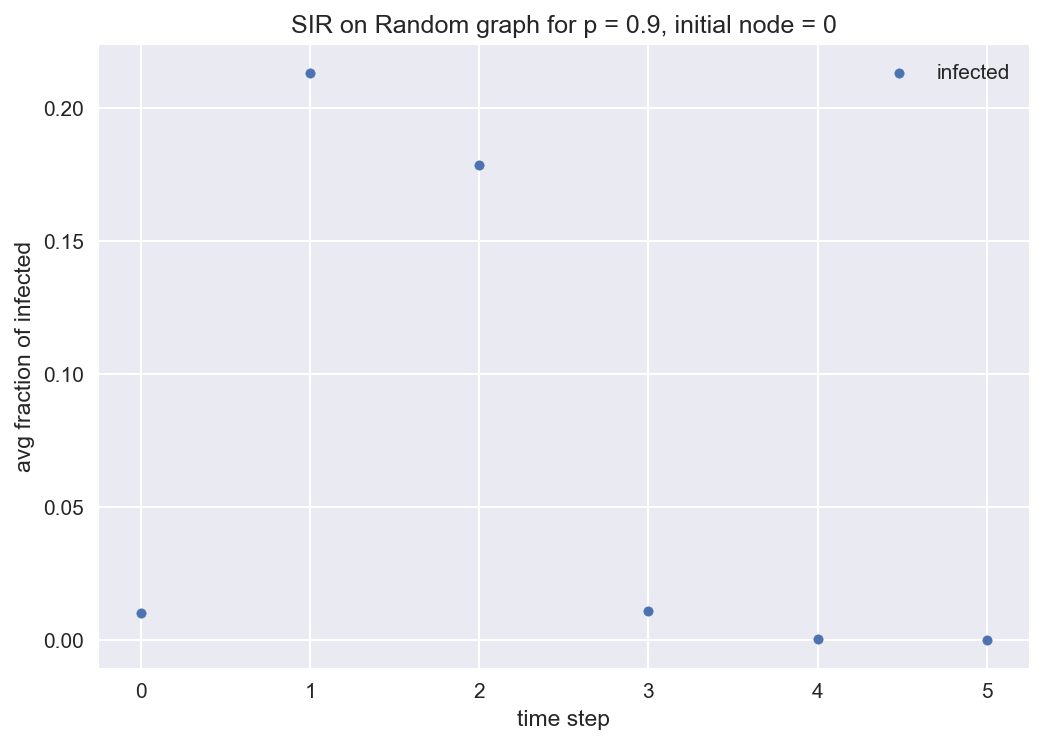

In [26]:
plot_sir_graph(100, rg, 0.9, 0, 'Random graph')

In [31]:
ws = nx.watts_strogatz_graph(100, 4, 0.4)

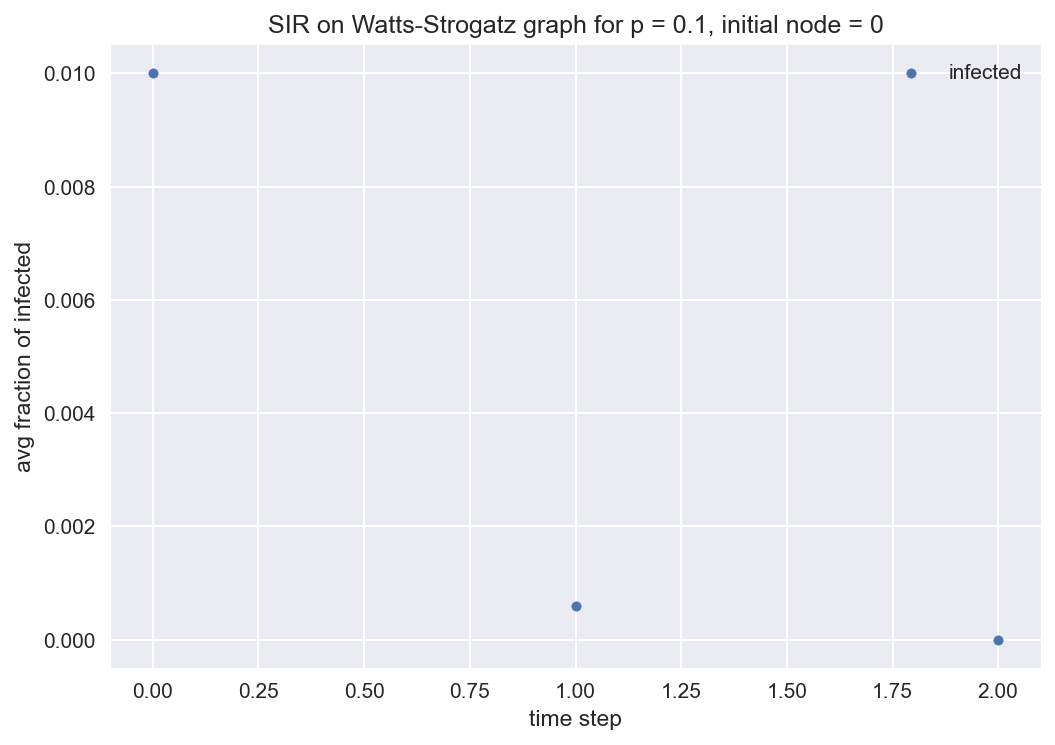

In [32]:
plot_sir_graph(100, ws, 0.1, 0, 'Watts-Strogatz graph')

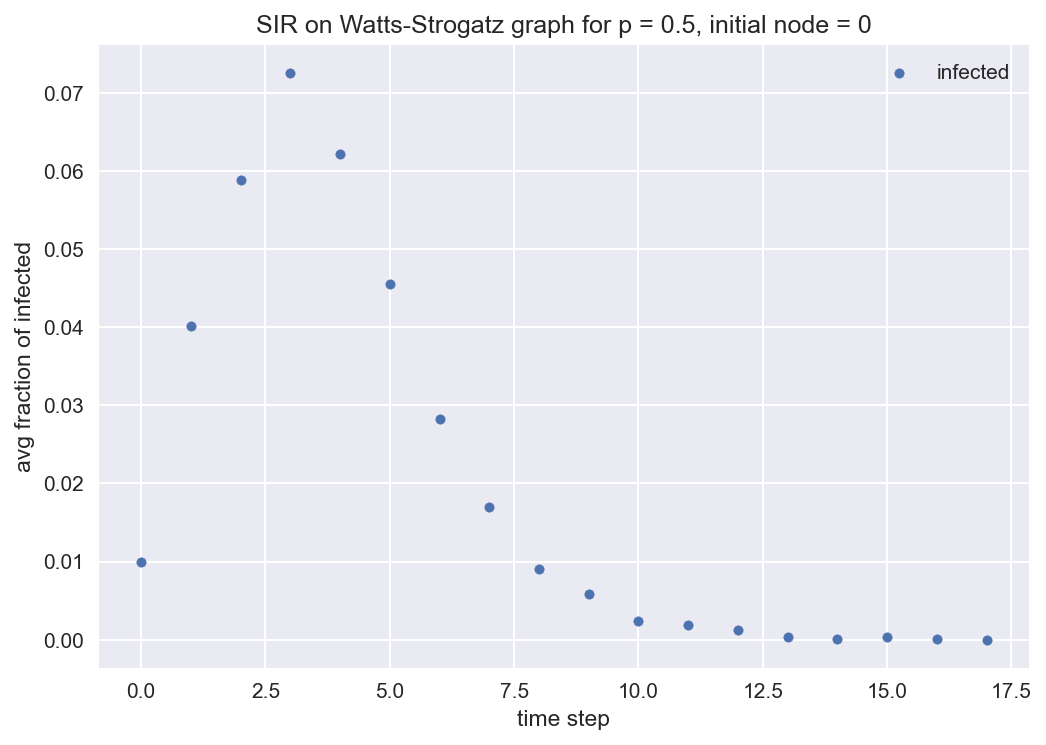

In [33]:
plot_sir_graph(100, ws, 0.5, 0, 'Watts-Strogatz graph')

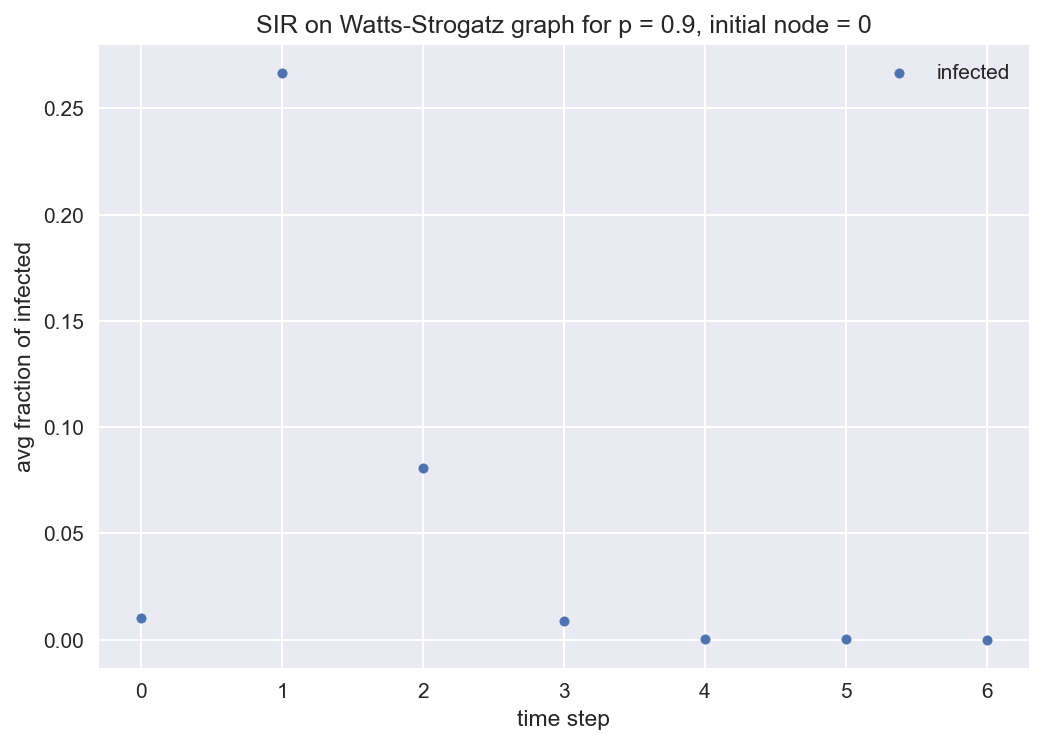

In [34]:
plot_sir_graph(100, ws, 0.9, 0, 'Watts-Strogatz graph')

In [27]:
ba = nx.barabasi_albert_graph(100, 2)

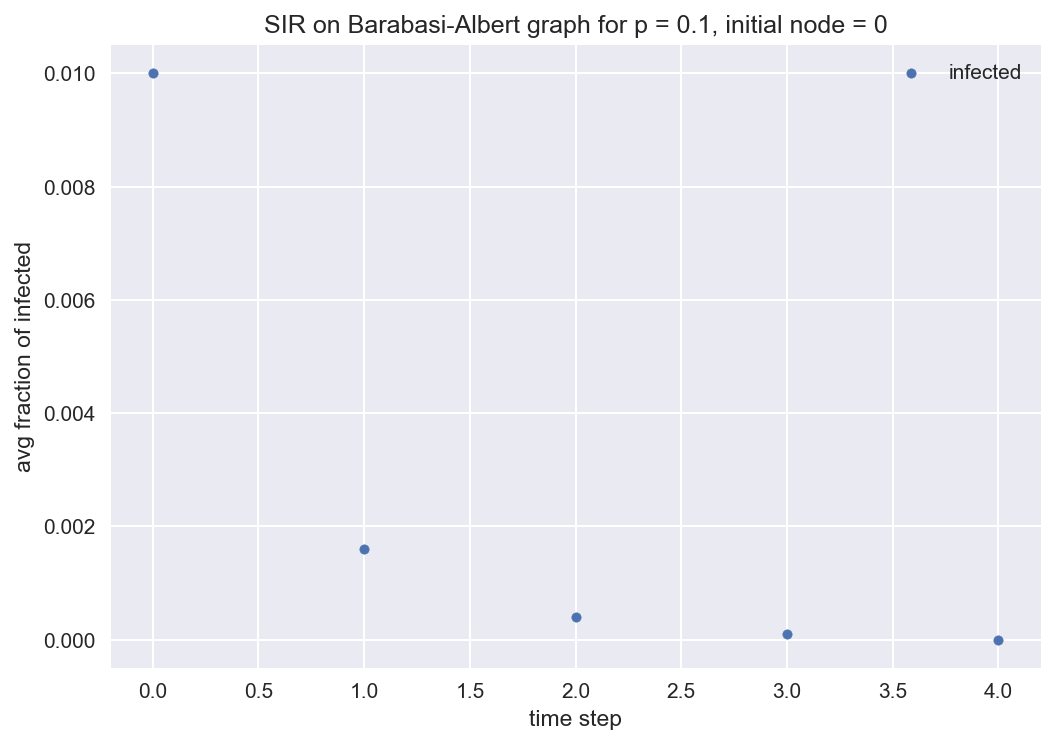

In [28]:
plot_sir_graph(100, ba, 0.1, 0, 'Barabasi-Albert graph')

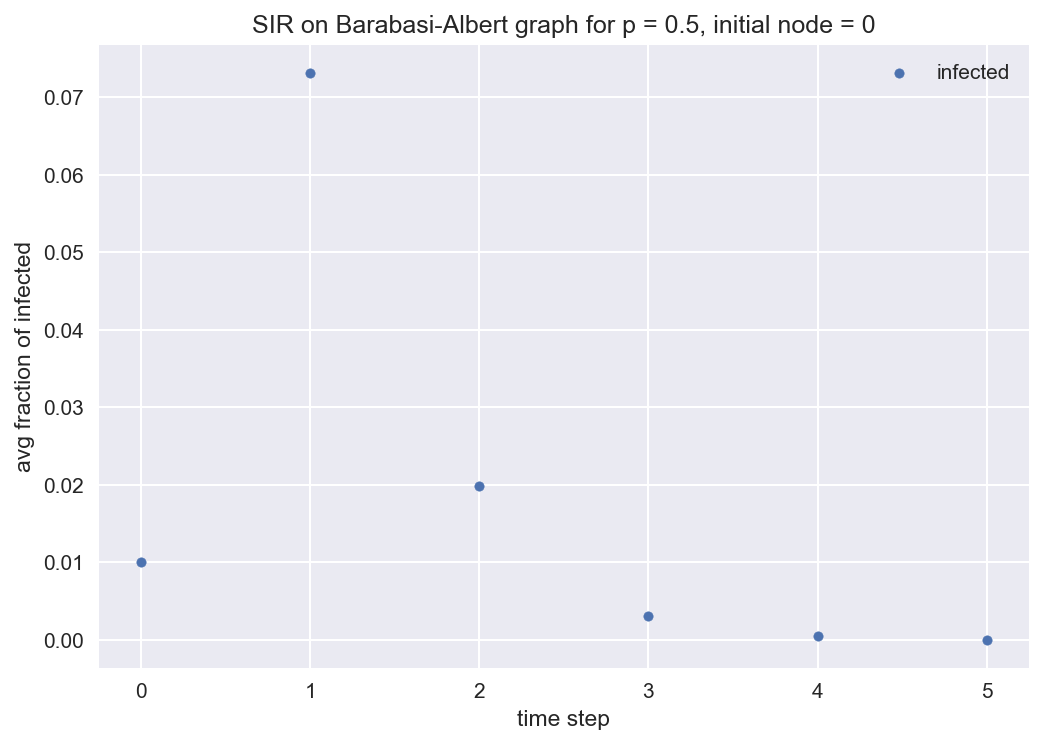

In [29]:
plot_sir_graph(100, ba, 0.5, 0, 'Barabasi-Albert graph')

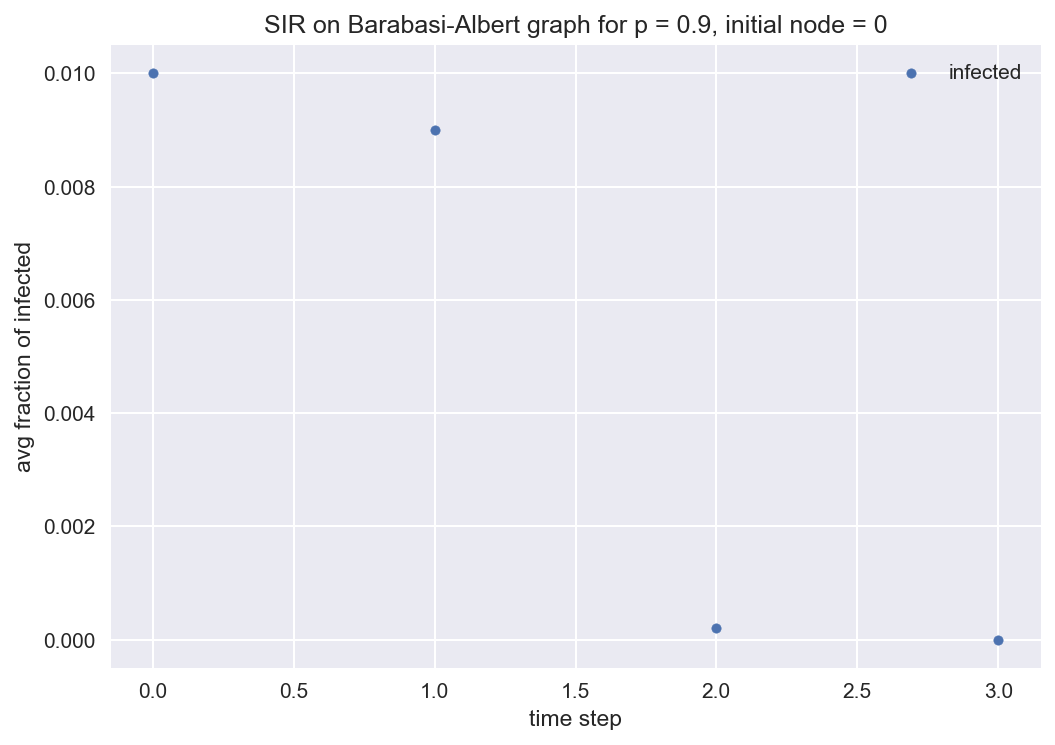

In [30]:
plot_sir_graph(100, ba, 0.9, 0, 'Barabasi-Albert graph')

In [59]:
ps = np.arange(0, 1.01, 0.01)

In [60]:
# choose parameters so that the mean degree is similar for all graphs
net0 = nx.grid_2d_graph(10, 10)
net0_mean = np.mean([d for n, d in net0.degree()])
rg0 = nx.erdos_renyi_graph(100, 0.04)
rg0_mean = np.mean([d for n, d in rg0.degree()])
ws0 = nx.watts_strogatz_graph(100, 4, 0.3)
ws0_mean = np.mean([d for n, d in ws0.degree()])
ba0 = nx.barabasi_albert_graph(100, 2)
ba0_mean = np.mean([d for n, d in ba0.degree()])
print([net0_mean, rg0_mean, ws0_mean, ba0_mean])

[3.6, 3.7, 4.0, 3.92]


In [61]:
avg_inf_frac = np.zeros((len(ps), 4))
avg_clear_time = np.zeros((len(ps), 4))
avg_inf_max = np.zeros((len(ps), 4))

In [63]:
for p in range(len(ps)):
    inf_frac = np.zeros((100, 4))
    clear_time = np.zeros((100, 4))
    inf_max = np.zeros((100, 4))
    for i in range(100):
        n = sir_graph(net0, ps[p], measure=True)
        r = sir_graph(rg0, ps[p], measure=True)
        w = sir_graph(ws0, ps[p], measure=True)
        b = sir_graph(ba0, ps[p], measure=True)
        inf_frac[i] = [n[0], r[0], w[0], b[0]]
        clear_time[i] = [n[1], r[1], w[1], b[1]]
        inf_max[i] = [n[2], r[2], w[2], b[2]]
        
    avg_inf_frac[p] = np.mean(inf_frac, axis=0)
    avg_clear_time[p] = np.mean(clear_time, axis=0)
    avg_inf_max[p] = np.mean(inf_max, axis=0)

In [64]:
avg_inf_frac = pd.DataFrame(avg_inf_frac, columns=['2D lattice', 'Random Graph', 'Watts-Strogatz', 'Barabasi-Albert'])
avg_clear_time = pd.DataFrame(avg_clear_time, columns=['2D lattice', 'Random Graph', 'Watts-Strogatz', 'Barabasi-Albert'])
avg_inf_max = pd.DataFrame(avg_inf_max, columns=['2D lattice', 'Random Graph', 'Watts-Strogatz', 'Barabasi-Albert'])

In [67]:
avg_inf_frac['probability of infection'] = ps
avg_clear_time['probability of infection'] = ps
avg_inf_max['probability of infection'] = ps

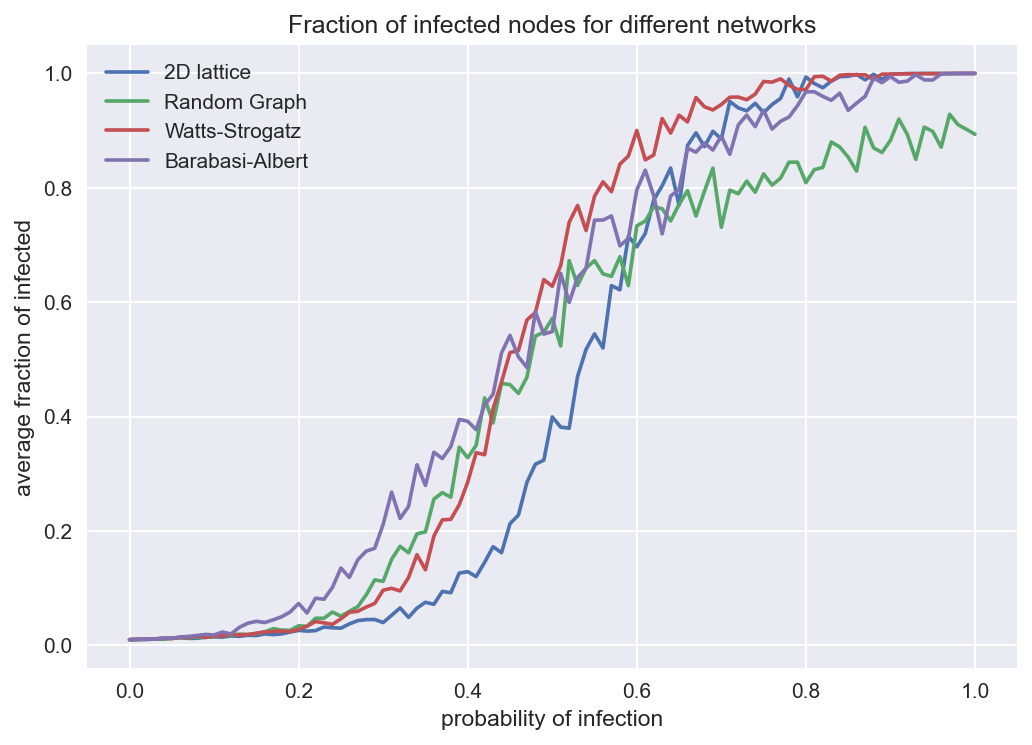

In [77]:
ax = avg_inf_frac.plot(x='probability of infection', title='Fraction of infected nodes for different networks')
ax.set_ylabel('average fraction of infected')
plt.show()

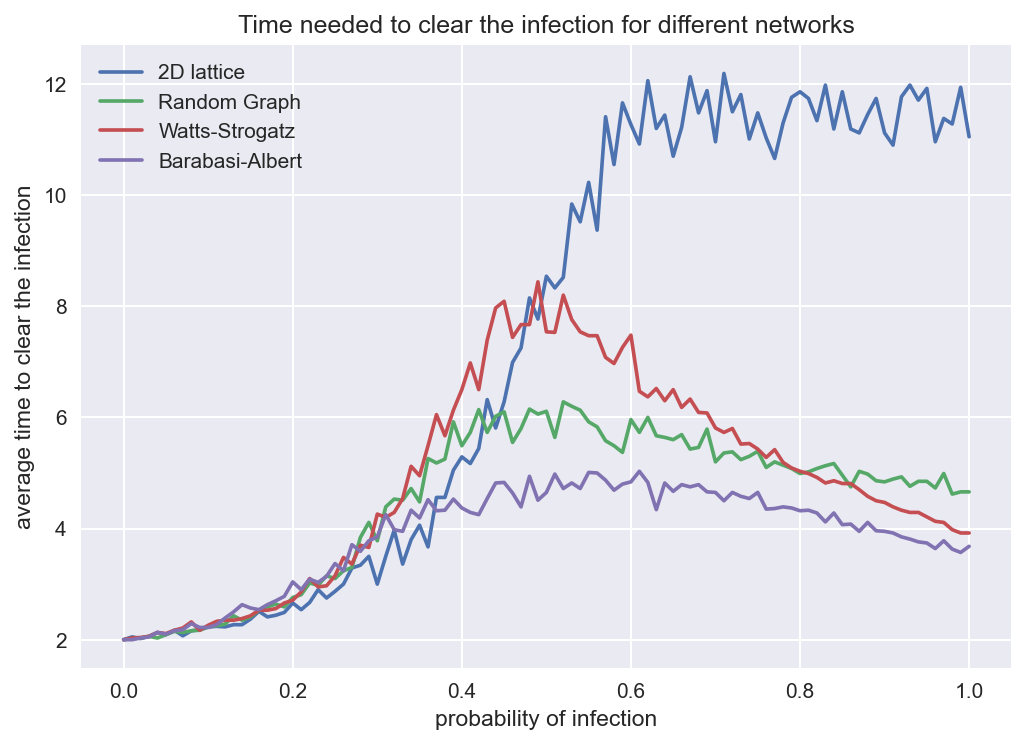

In [78]:
ax = avg_clear_time.plot(x='probability of infection', title='Time needed to clear the infection for different networks')
ax.set_ylabel('average time to clear the infection')
plt.show()

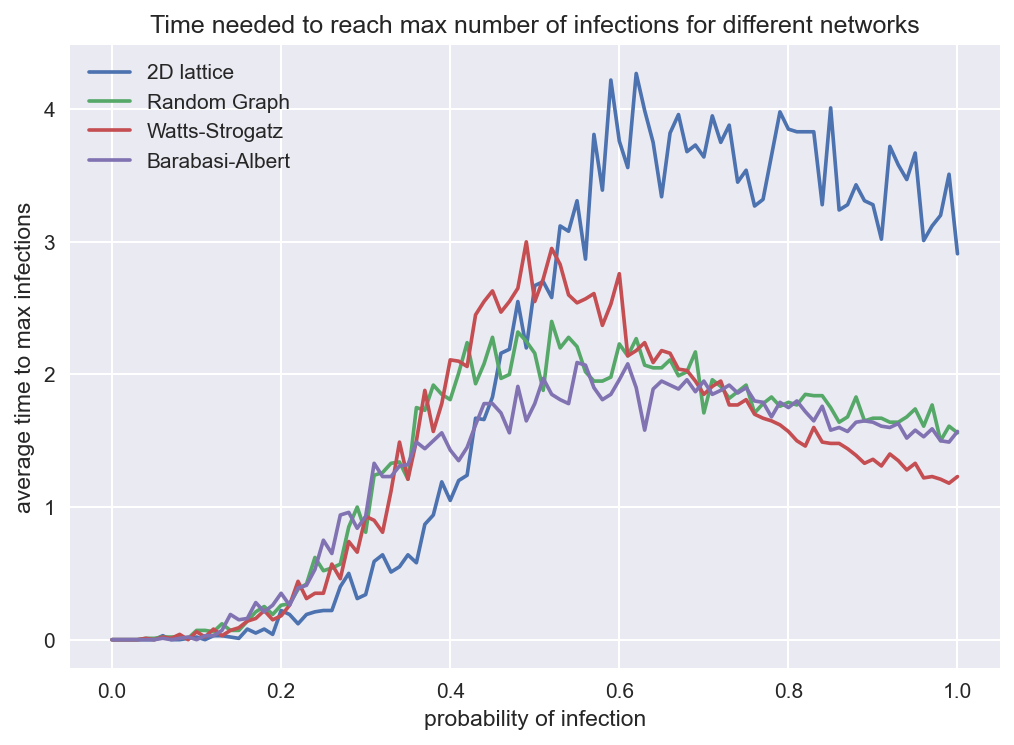

In [79]:
ax = avg_inf_max.plot(x='probability of infection', title='Time needed to reach max number of infections for different networks')
ax.set_ylabel('average time to max infections')
plt.show()

In [109]:
# recompile with new parameters!!!

In [90]:
net1 = nx.grid_2d_graph(6, 5)
pos1 = dict((n, n) for n in net1.nodes)
np.mean([d for n, d in net1.degree()])

3.2666666666666666

In [9]:
save_anim(net1, pos1, '2d_lattice')

In [98]:
rg1 = nx.erdos_renyi_graph(30, 0.12)
pos2 = nx.spring_layout(rg1)
np.mean([d for n, d in rg1.degree()])

3.2666666666666666

In [11]:
save_anim(rg1, pos2, 'rand_graph')

In [106]:
ws1 = nx.watts_strogatz_graph(30, 4, 0.4)
pos3 = nx.spring_layout(ws1)
np.mean([d for n, d in ws1.degree()])

4.0

In [13]:
save_anim(ws1, pos3, 'ws_graph')

In [108]:
ba1 = nx.barabasi_albert_graph(30, 2)
pos4 = nx.spring_layout(ba1)
np.mean([d for n, d in ba1.degree()])

3.7333333333333334

In [15]:
save_anim(ba1, pos4, 'ba_graph')

### 2D lattice

<img src='animation/2d_lattice.gif'>

### Random graph

<img src = 'animation/rand_graph.gif'>

### Watts-Strogatz graph

<img src = 'animation/ws_graph.gif'>

### Barabasi-Albert graph

<img src = 'animation/ba_graph.gif'>

# Task 3

In [8]:
def sir_graph2(graph, p, init_node = 'rand', measure=False):
    
    for node in graph.nodes():
        graph.nodes[node]['state'] = 'S'
        
    N = len(graph.nodes)
    node_list = list(graph.nodes)
    
    if init_node == 'rand':
        initial = rd.choice(node_list)
    else:
        initial = init_node
        
    graph.nodes[initial]['state'] = 'I'     
    
    nodes_data = graph.nodes(data=True)
    infected = [node for node, data in nodes_data if data['state'] == 'I']
    
    I = [1]
        
    while len(infected) > 0:
        
        for i in range(N):
            
            ind = rd.randint(0, N-1)
            node = node_list[ind]
            
            if graph.nodes[node]['state'] == 'I':
                neighs = graph.neighbors(node)
                sus = [n for n in neighs if graph.nodes[n]['state'] == 'S']
                for s in sus:
                    if rd.random() < p:
                        graph.nodes[s]['state'] = 'I'     
                        
                graph.nodes[node]['state'] = 'R'
                             
        nodes_data = graph.nodes(data=True)
        infected = [node for node, data in nodes_data if data['state'] == 'I']
        I.append(len(infected))
    
    if measure == True:
        nodes_data = graph.nodes(data=True)
        infected_fraction = len([node for node, data in nodes_data if data['state'] == 'R']) / N
        max_infected = I.index(max(I))
        measures = [infected_fraction, len(I), max_infected]
    
    if measure == True:
        return measures
    else:
        return np.array(I)

In [9]:
def plot_sir_graph2(n, graph, p, init_node, graph_type):
    
    res = sir_graph2(graph, p, init_node)
    N = len(graph.nodes)
    d = {'0': res / N}
    
    for i in range(1, n):
        res_new = sir_graph(graph, p, init_node)
        d[f'{i}'] = res_new / N
    
    df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in d.items()]))
    df.fillna(0, inplace=True)
    df['avg fraction of infected'] = df.mean(axis='columns')
    df['time step'] = df.index

    df.plot(kind='scatter', x='time step', y='avg fraction of infected', label='infected',
            title=f'SIR on {graph_type} for p = {p}, initial node = {init_node}')

In [19]:
net2 = nx.grid_2d_graph(10, 10)
mn = np.mean([d for n, d in net2.degree()])
rg2 = nx.erdos_renyi_graph(100, 0.04)
mrg = np.mean([d for n, d in rg2.degree()])
ws2 = nx.watts_strogatz_graph(100, 4, 0.4)
mws = np.mean([d for n, d in ws2.degree()])
ba2 = nx.barabasi_albert_graph(100, 2)
mba = np.mean([d for n, d in ba2.degree()])
[mn, mrg, mws, mba]

[3.6, 3.86, 4.0, 3.92]

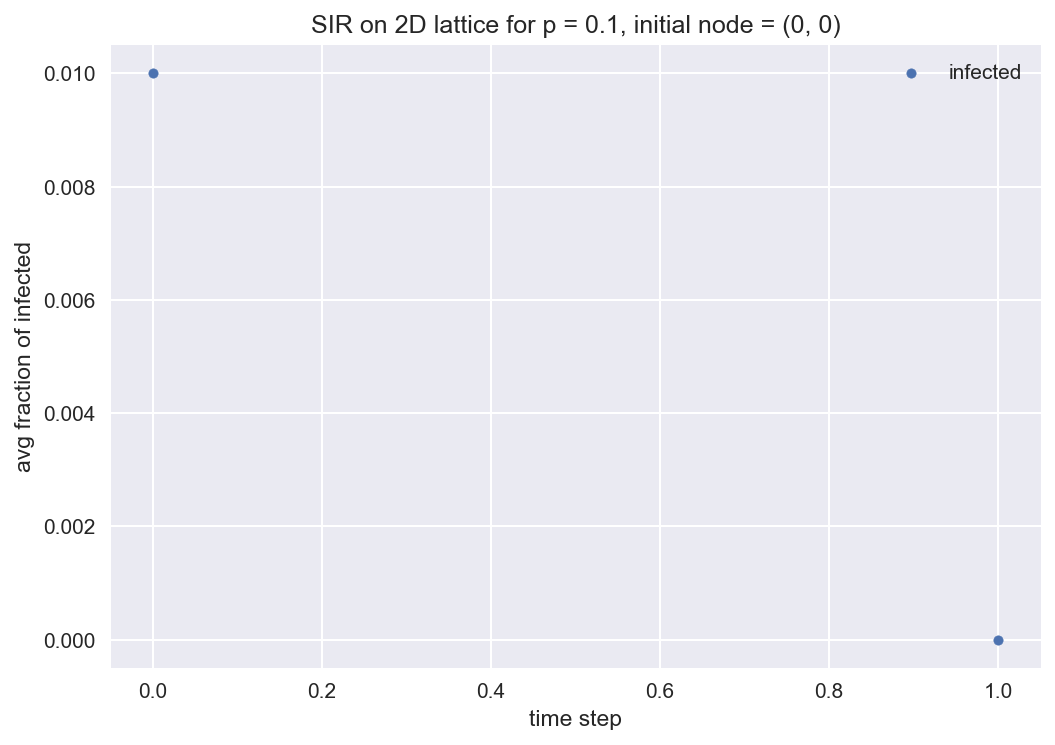

In [31]:
plot_sir_graph2(100, net2, 0.1, (0,0), '2D lattice')

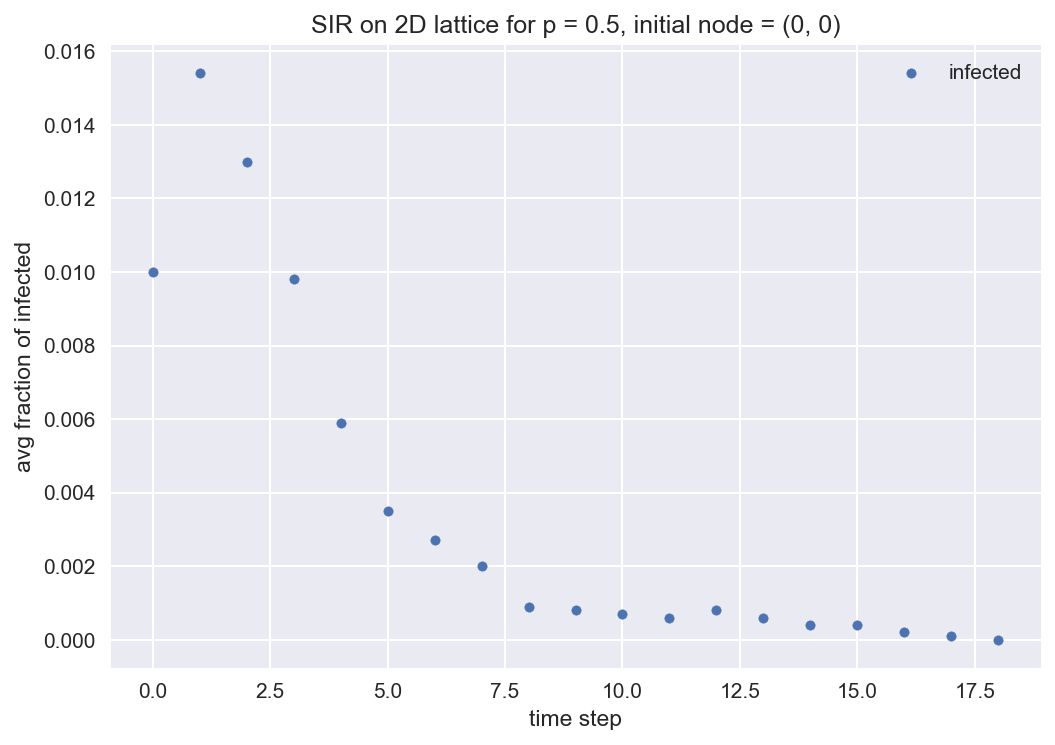

In [32]:
plot_sir_graph2(100, net2, 0.5, (0,0), '2D lattice')

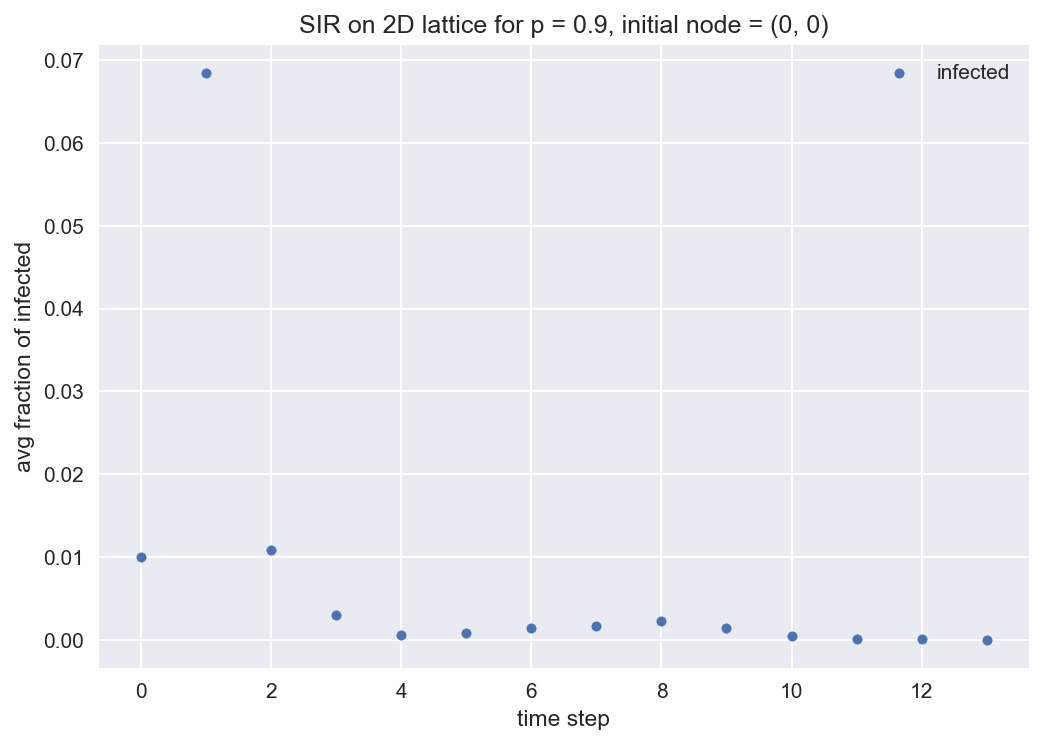

In [33]:
plot_sir_graph2(100, net2, 0.9, (0,0), '2D lattice')

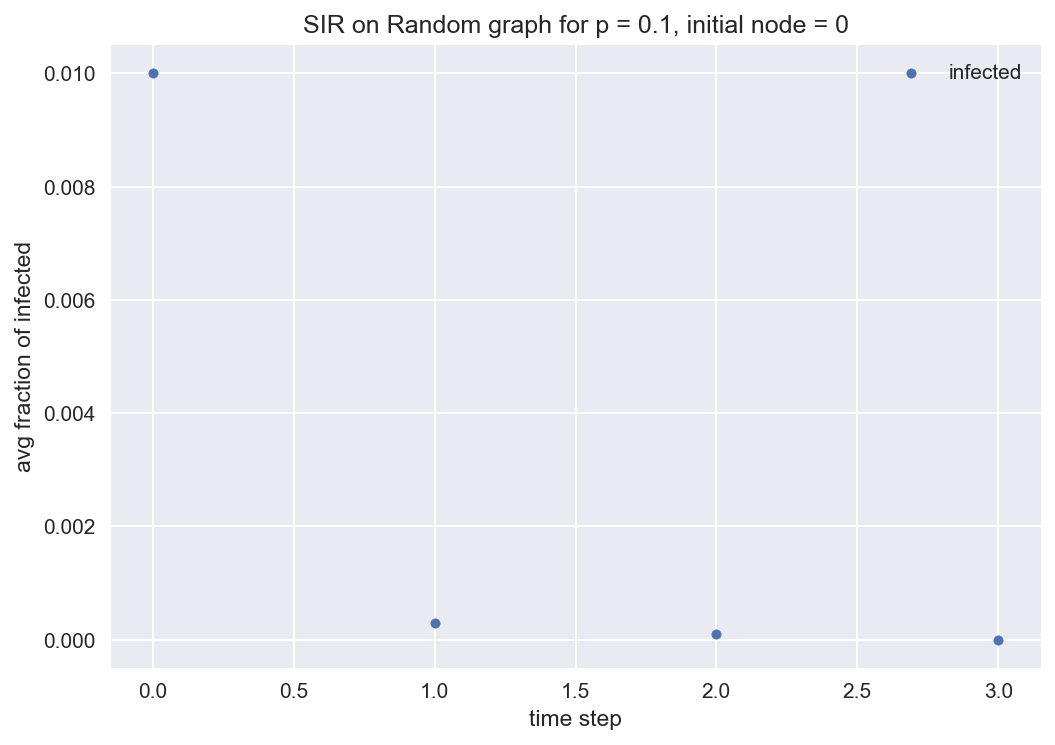

In [43]:
plot_sir_graph2(100, rg, 0.1, 0, 'Random graph')

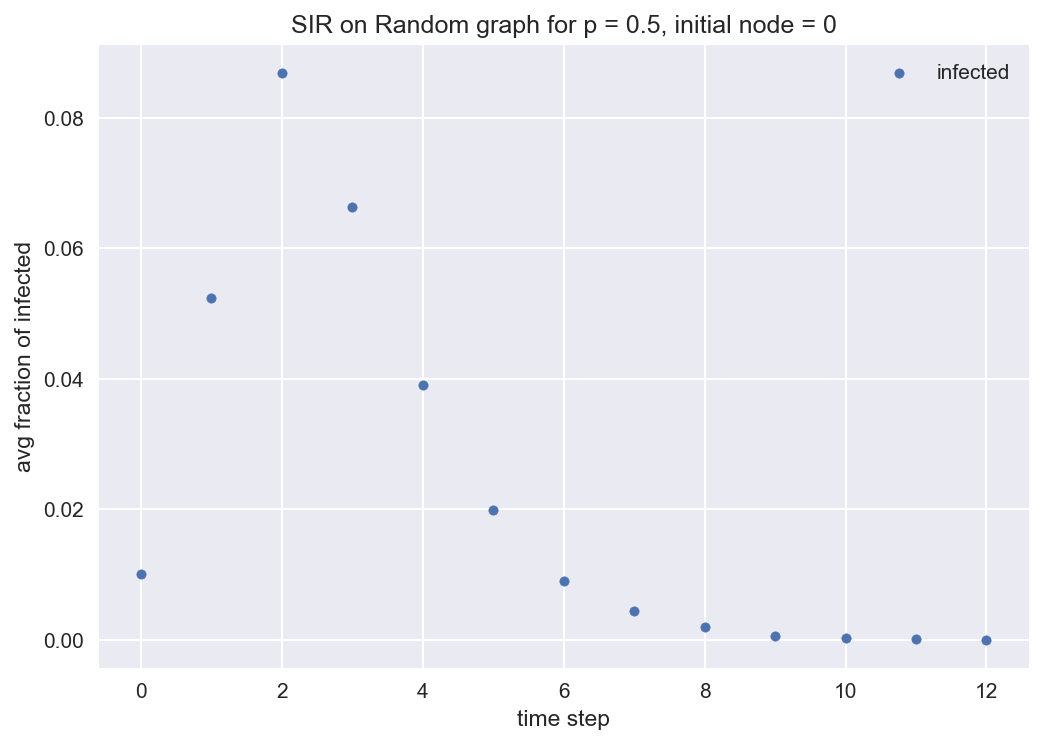

In [44]:
plot_sir_graph2(100, rg, 0.5, 0, 'Random graph')

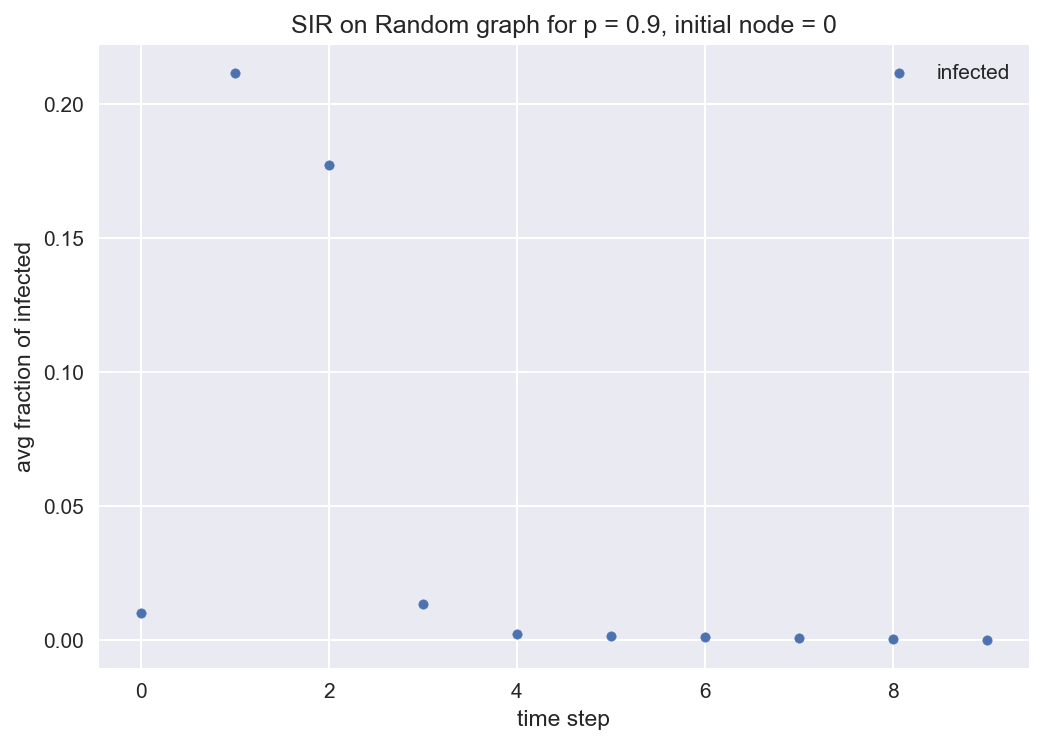

In [45]:
plot_sir_graph2(100, rg, 0.9, 0, 'Random graph')

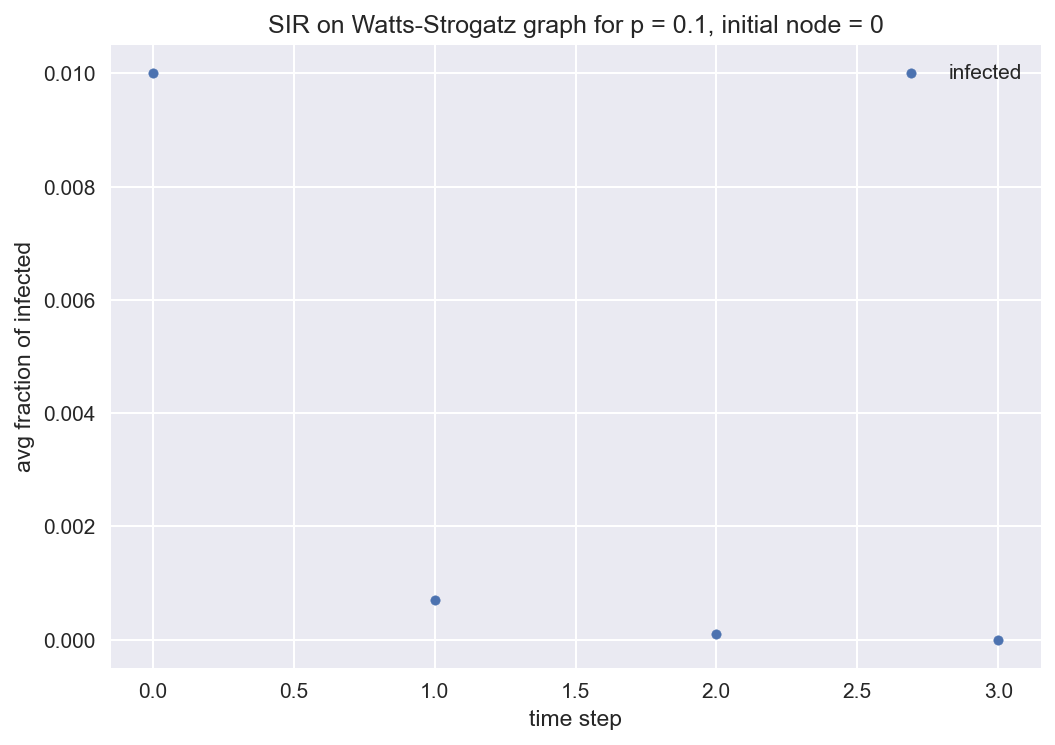

In [46]:
plot_sir_graph2(100, ws, 0.1, 0, 'Watts-Strogatz graph')

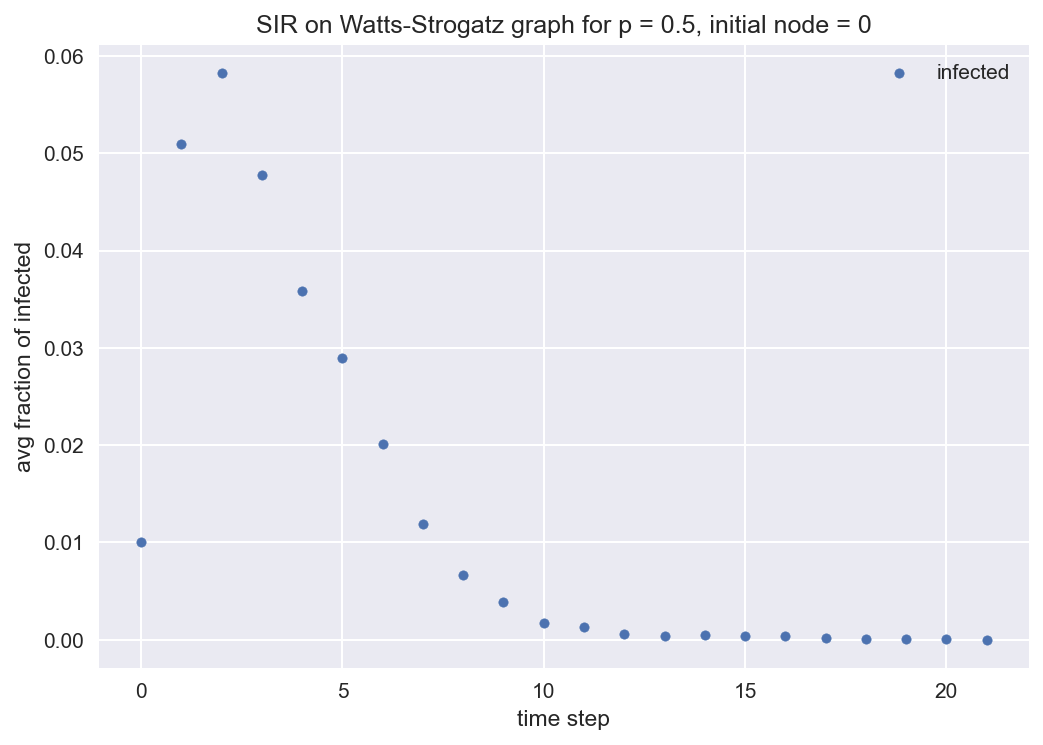

In [47]:
plot_sir_graph2(100, ws, 0.5, 0, 'Watts-Strogatz graph')

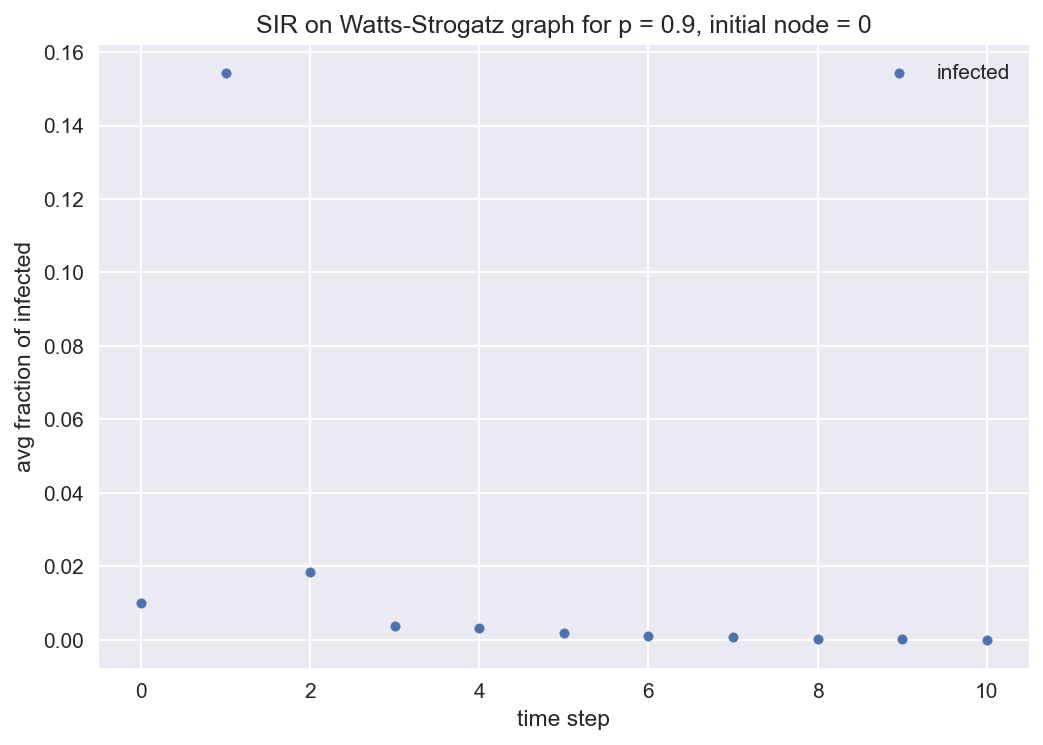

In [48]:
plot_sir_graph2(100, ws, 0.9, 0, 'Watts-Strogatz graph')

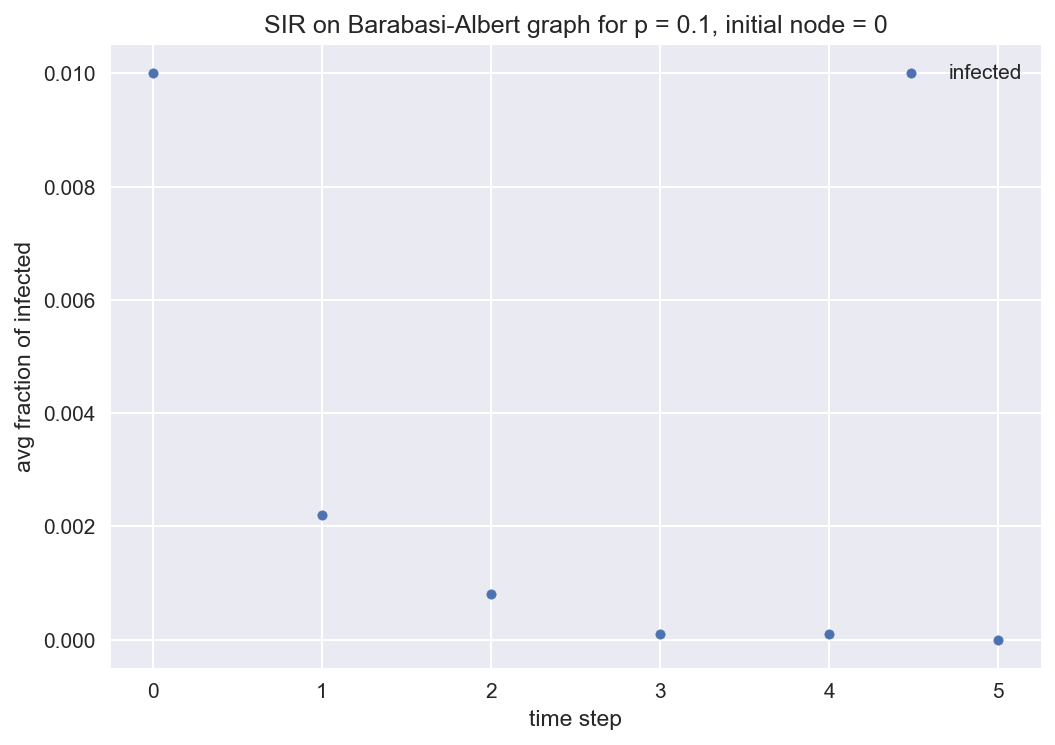

In [49]:
plot_sir_graph2(100, ba, 0.1, 0, 'Barabasi-Albert graph')

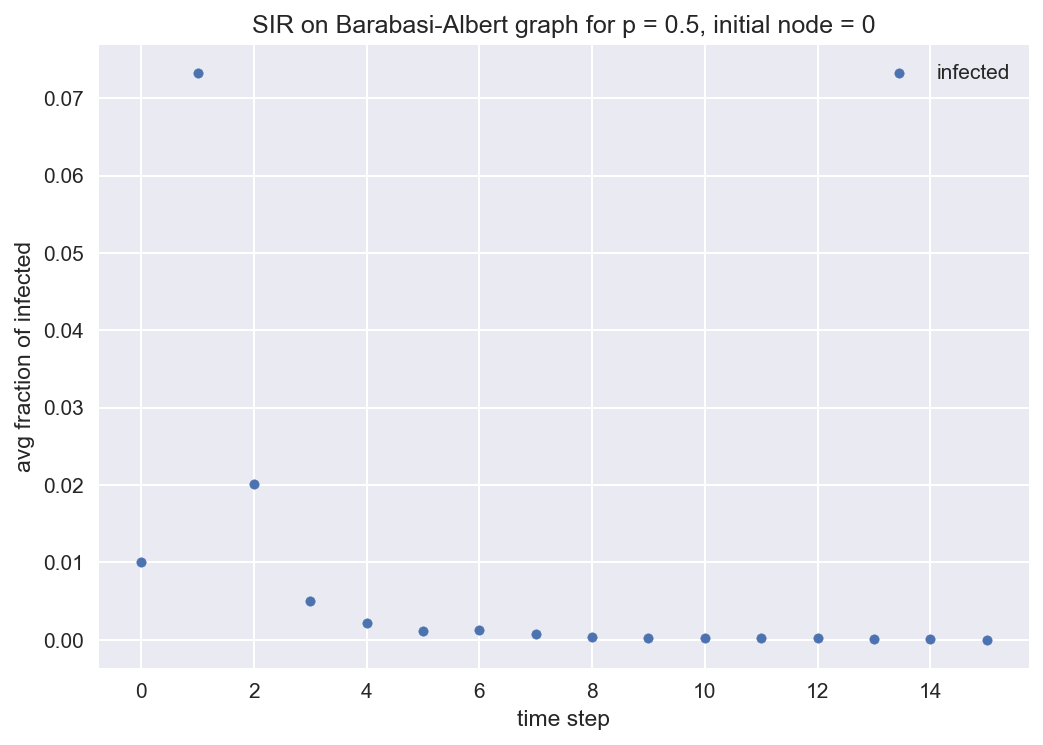

In [50]:
plot_sir_graph2(100, ba, 0.5, 0, 'Barabasi-Albert graph')

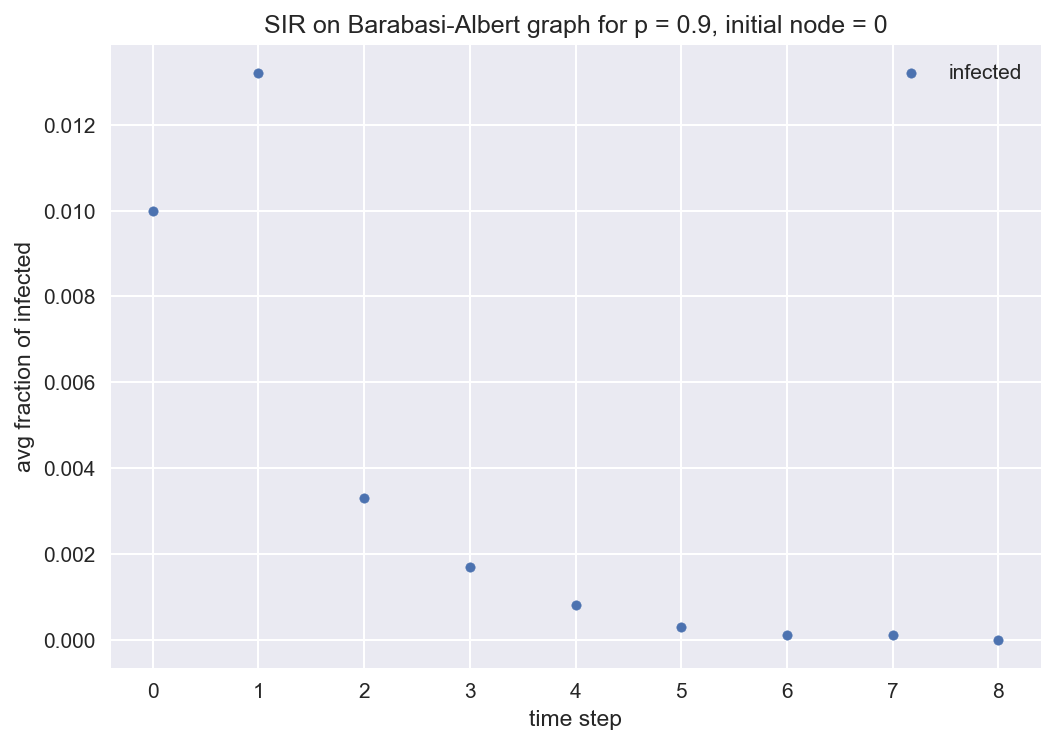

In [51]:
plot_sir_graph2(100, ba, 0.9, 0, 'Barabasi-Albert graph')